In [3]:
pwd

'C:\\Users\\sidha'

In [37]:
# Import dependencies
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [102]:
# Read the training and testing Sets
df = pd.read_csv('train.csv')

In [14]:
#Feature Identification
print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# Univariate Analysis
#Continous
df[['Age','SibSp','Fare']].describe()

,Age,SibSp,Fare
count,714.000000,891.000000,891.000000
mean,29.699118,0.523008,32.204208
std,14.526497,1.102743,49.693429
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,7.910400
50%,28.000000,0.000000,14.454200
75%,38.000000,1.000000,31.000000
max,80.000000,8.000000,512.329200


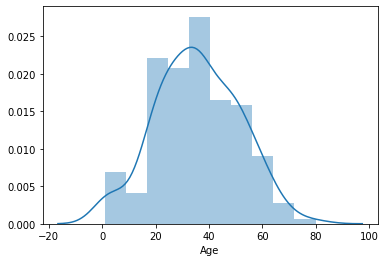

In [117]:
df2 = df.dropna()
sns.distplot(df2['Age'])

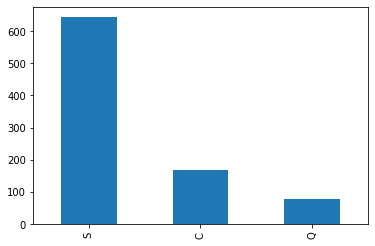

In [159]:
df_em = df['Embarked'].value_counts()
df_em.plot(kind='bar')

In [128]:
print("Frequency of S " + str(df_em['S']/df_em.sum()))

Frequency of S 0.7244094488188977


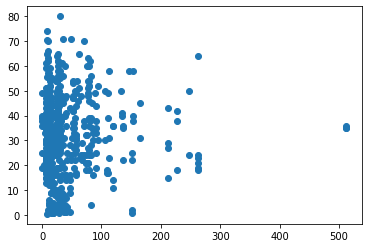

In [129]:
#BiVariate Analysis
#Continous vs Continous - Scatter
from matplotlib import pyplot
pyplot.scatter(df['Fare'], df['Age'])
pyplot.show()

In [53]:
# Continous vs Continous - Correlation
def covar(a, b):

    a_mean = numpy.mean(a) #sum(a)/len(a)
    b_mean = numpy.mean(b)
    length = len(a)
    sum = 0
    
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/length

In [54]:
covariance = covar(df['PassengerId'].values, df['SibSp'].values)
print(covariance)
print(covariance/math.sqrt((numpy.var(df['PassengerId'].values)*numpy.var(df['SibSp'].values))))

-16.307519640852977
-0.05752683378444149


In [136]:
x = numpy.cov(df['PassengerId'].values, df['SibSp'].values)
print(x[0][1])

-16.325842696629223


In [158]:
#Continous vs Continous - Two Table method
df2 = df.dropna()
total = df2.shape[0]
cols = df2['Embarked'].unique()
rows = df2['Survived'].unique()
print(cols)
print(rows)
table = []
for i in rows:
    curr = []
    for j in cols:
        df2 = df
        df2 = df2[df2['Embarked'] == j]
        df2 = df2[df2['Survived'] == int(i)]
        count = df2.shape[0]
        curr.append(count)
    table.append(curr)
print(table)

['C' 'S' 'Q']
[1 0]
[[93, 217, 30], [75, 427, 47]]


In [139]:
#Data Cleaning
#Drop Duplicates
df2 = df.drop_duplicates();
print(df2.shape[0] - df.shape[0])
df2 = df.drop_duplicates(subset=['Age','Fare']);
print(df2.shape[0] - df.shape[0])

0
-180


In [87]:
#Data Imputation
for i in df.columns:
    df2 = df.loc[df[i].isnull()]
    if(df2.shape[0] > 0):
        print(i)

Age
Cabin
Embarked


In [75]:
df2 = df.loc[df['Embarked'].isnull()]
print(df2.shape)
df2.head()

(2, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


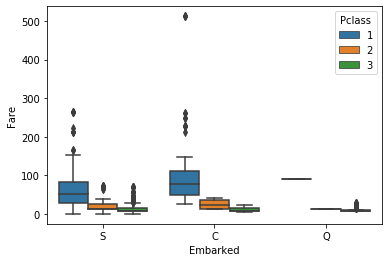

In [83]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df);

In [84]:
df["Embarked"] = df["Embarked"].fillna('C')

In [89]:
df2 = df.loc[df['Age'].isnull()]
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [93]:
#Median
df3 = df.dropna(axis=0, how = 'any')
print(df3['Age'].median())
df3 = df3.loc[df3['Fare'] >= 6]
df3 = df3.loc[df3['Fare'] <= 10]
print(df3['Age'].median())

36.0
28.5


In [99]:
df2 = df.loc[df['Cabin'].isnull()]
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [110]:
# Most Frequent
df2 = df.dropna(axis=1,how='any')
df2 = df.loc[df['Pclass'] == 3]
df2 = df2.loc[df2['Embarked'] == 'S']
df2['Cabin'].value_counts()

G6       4
F G73    2
E121     2
E10      1
F G63    1
Name: Cabin, dtype: int64

In [113]:
# Interpolation
s = pd.Series([0, 1, numpy.nan, 3])
print(s)
s.interpolate(method='linear',inplace=True)
print(s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64
